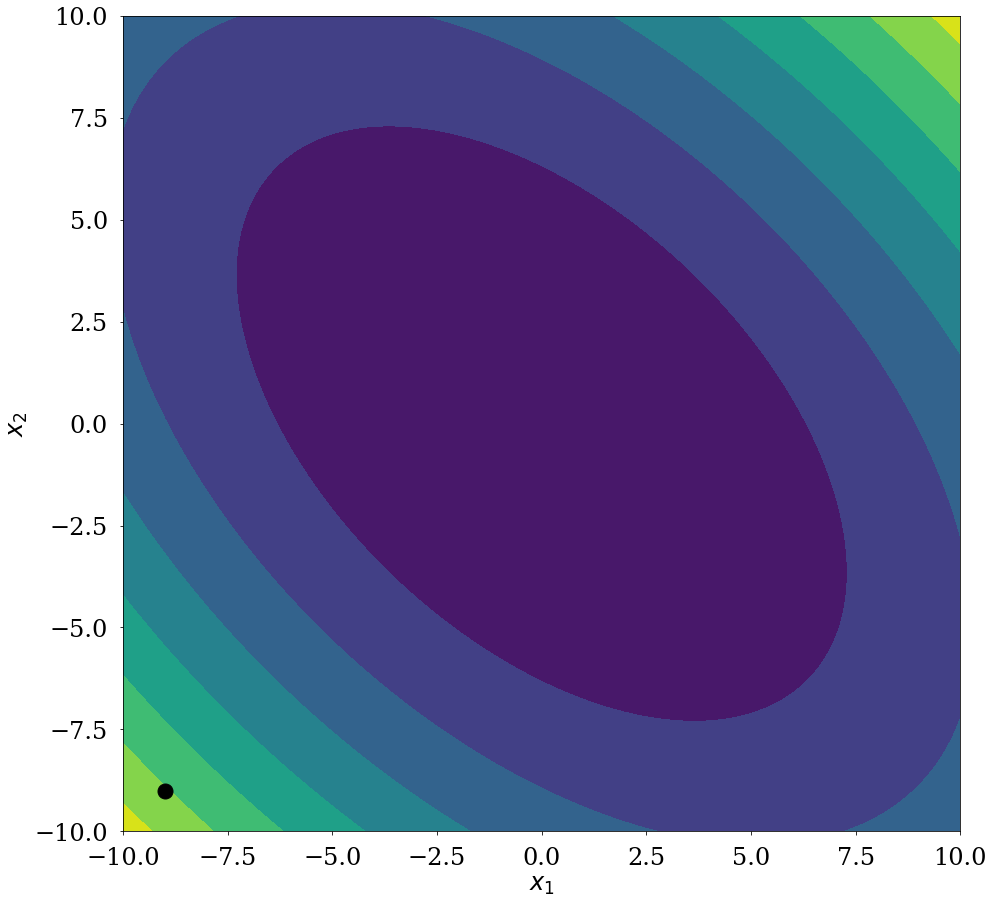

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({"font.size": 24})
plt.rcParams["xtick.major.pad"] = "12"
plt.rcParams["ytick.major.pad"] = "12"

xmin=-10
xmax=10
ymin=-10
ymax=10
mm=np.zeros(2)
mm[0]=-9
mm[1]=-9
x0 = np.linspace(xmin,xmax,100)
y0 = np.linspace(ymin,ymax,100)
xp,yp = np.meshgrid(x0,y0)
zp=xp**2+yp**2+xp*yp #quadratic
plt.subplots(figsize=(15,15))
plt.contourf(x0,y0,zp)
plt.plot(mm[0],mm[1],'ko',markersize=15)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()


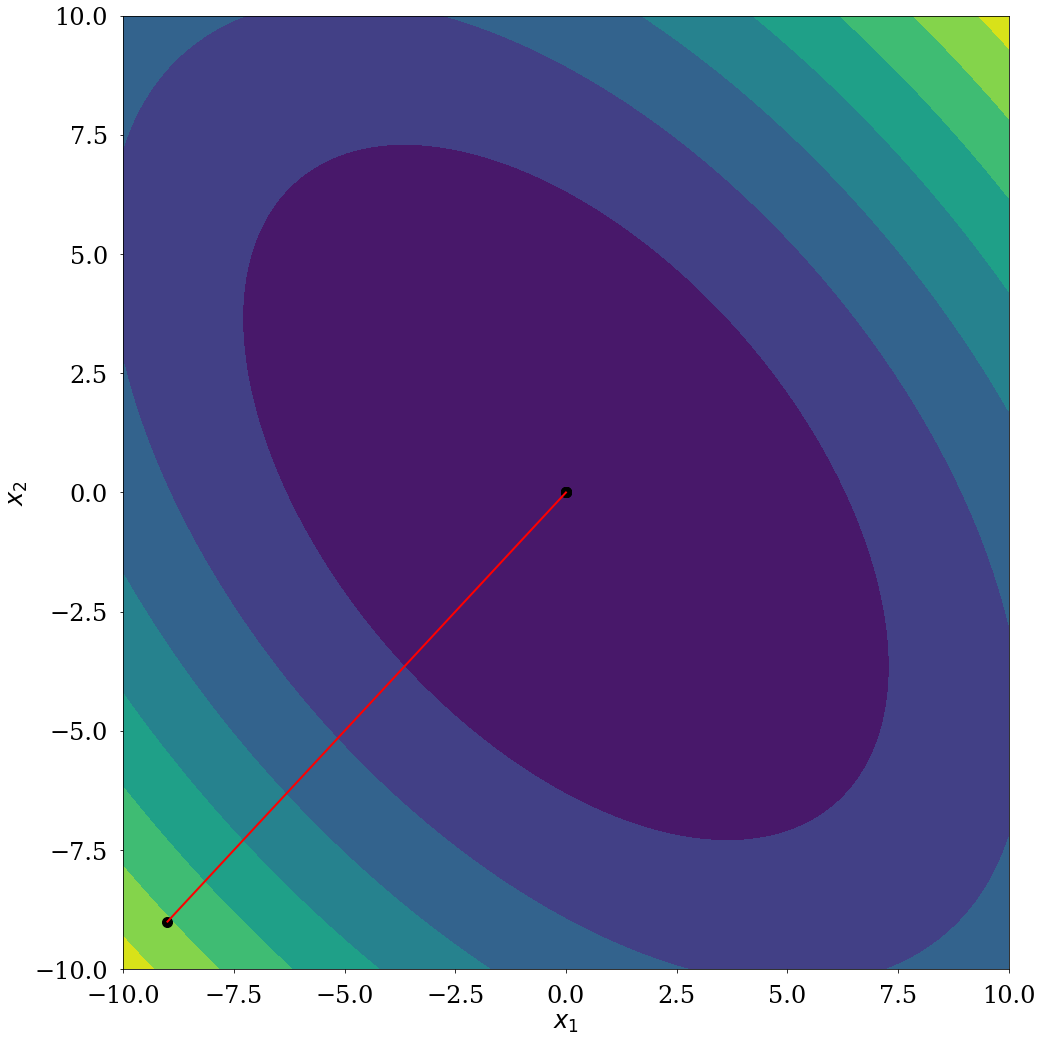

In [2]:
from sympy import *

#initial model
mm=np.zeros(2)
mm[0]=-9
mm[1]=-9

x1,x2= symbols('x1 x2')
ff =x1**2+x2**2+x1*x2 #quadratic

#gradient
dfdx1=diff(ff,x1)
dfdx2=diff(ff,x2)
df=np.zeros(2)

maxiter=5
miter=np.zeros((maxiter+1,2))
miter[0,:]=mm
for iter in range(1,maxiter+1):
    df[0]=dfdx1.subs([(x1,mm[0]),(x2,mm[1])])
    df[1]=dfdx2.subs([(x1,mm[0]),(x2,mm[1])])
    
    if (np.sqrt(np.dot(df,df)) < 1):
        break
        
    #find an optimal step-length
    step = symbols('step')
    expr=(mm[0]+step*df[0])**2+(mm[1]+step*df[1])**2+(mm[0]+step*df[0])*(mm[1]+step*df[1])
    expr=diff(expr,step)
    step=solve(expr,step)
    
    #update model
    mnew = mm + step*df
    miter[iter,:]=mnew
    mm = mnew.copy()

xp,yp = np.meshgrid(x0,y0)
zp=xp**2+yp**2+xp*yp #quadratic
plt.subplots(1,figsize=(15,15))
plt.contourf(x0,y0,zp)
plt.plot(miter[:,0],miter[:,1],'ko',markersize=10)
plt.plot(miter[:,0],miter[:,1],'r',linewidth=2)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.tight_layout()
plt.savefig("steepest_quadratic.png")

# Latihan-1

Tentukan model optimum dari objective function berikut,
\begin{equation}
f(x,y)=10x^2+3y^2-10xy+2x
\end{equation}
dengan model awal (-9,9)

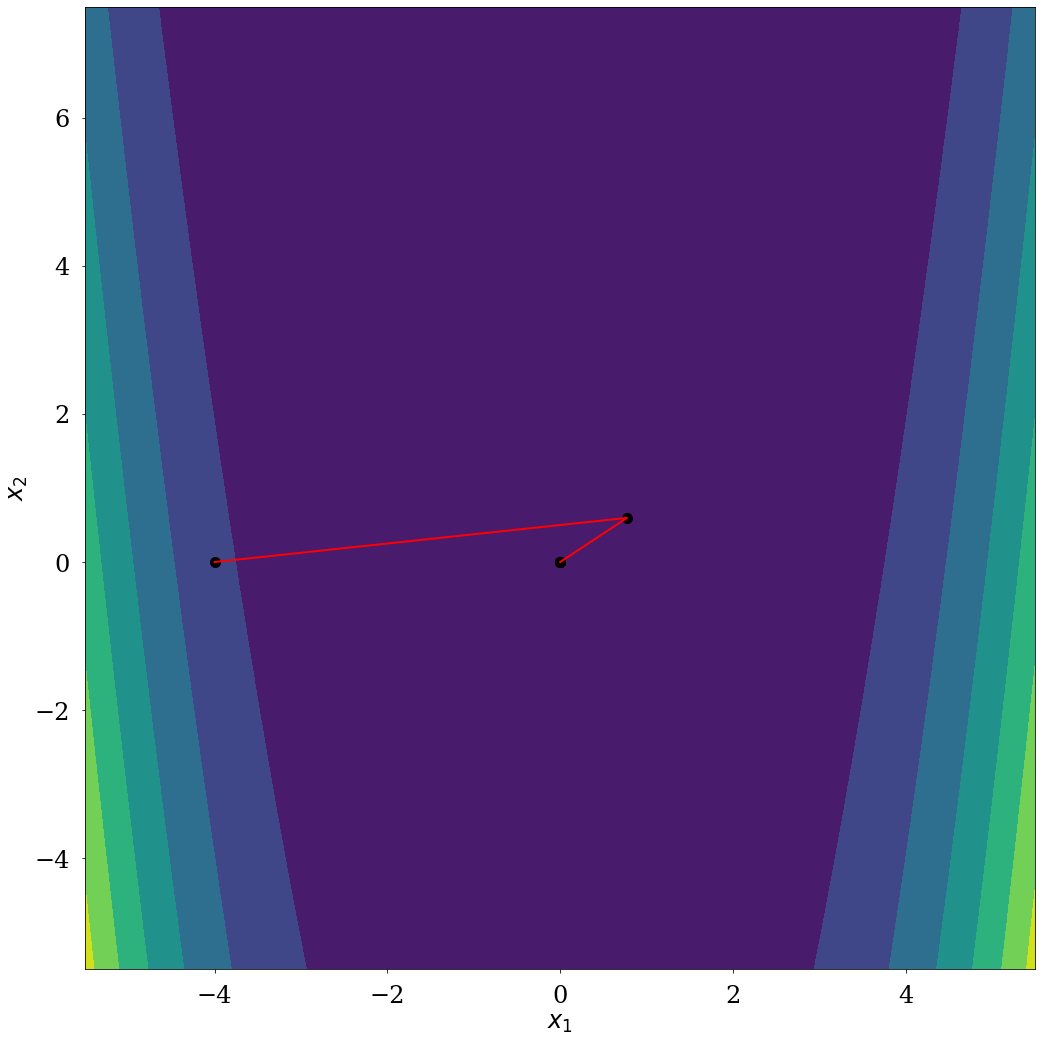

In [154]:
from sympy import *

#minimization

#initial model
mm=np.zeros(2)
mm[0]=-4
mm[1]=0

x1,x2= symbols('x1 x2')
ff=(1-x1)**2+100*(x2-x1**2)**2 #Rosenbrock

#gradient
dfdx1=diff(ff,x1)
dfdx2=diff(ff,x2)
df=np.zeros(2)

maxiter=5
miter=np.zeros((maxiter+1,2))
miter[0,:]=mm
for iter in range(1,maxiter+1):
    df[0]=dfdx1.subs([(x1,mm[0]),(x2,mm[1])])
    df[1]=dfdx2.subs([(x1,mm[0]),(x2,mm[1])])
    
    if (np.sqrt(np.dot(df,df)) < 1):
        break
        
    #find an optimal step-length
    step = symbols('step')
    expr=(1-(mm[0]+step*df[0]))**2+100*((mm[1]+step*df[1])-(mm[0]+step*df[0])**2)**2 #Rosenbrock
    expr=diff(expr,step)
    step=solve(expr,step)
    #take only one root
    step=np.absolute(step[0])
    
    #update model
    mnew = mm - step*df
    miter[iter,:]=mnew
    mm = mnew.copy()

xmin=-5.5
xmax=5.5
ymin=-5.5
ymax=7.5
x0 = np.linspace(xmin,xmax,100)
y0 = np.linspace(ymin,ymax,100)
xp,yp = np.meshgrid(x0,y0)
zp=(1-xp)**2+100*(yp-xp**2)**2 #Rosenbrock
plt.subplots(1,figsize=(15,15))
plt.contourf(x0,y0,zp)
plt.plot(miter[:,0],miter[:,1],'ko',markersize=10)
plt.plot(miter[:,0],miter[:,1],'r',linewidth=2)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.tight_layout()
plt.savefig("steepest_rosenbrock.png")

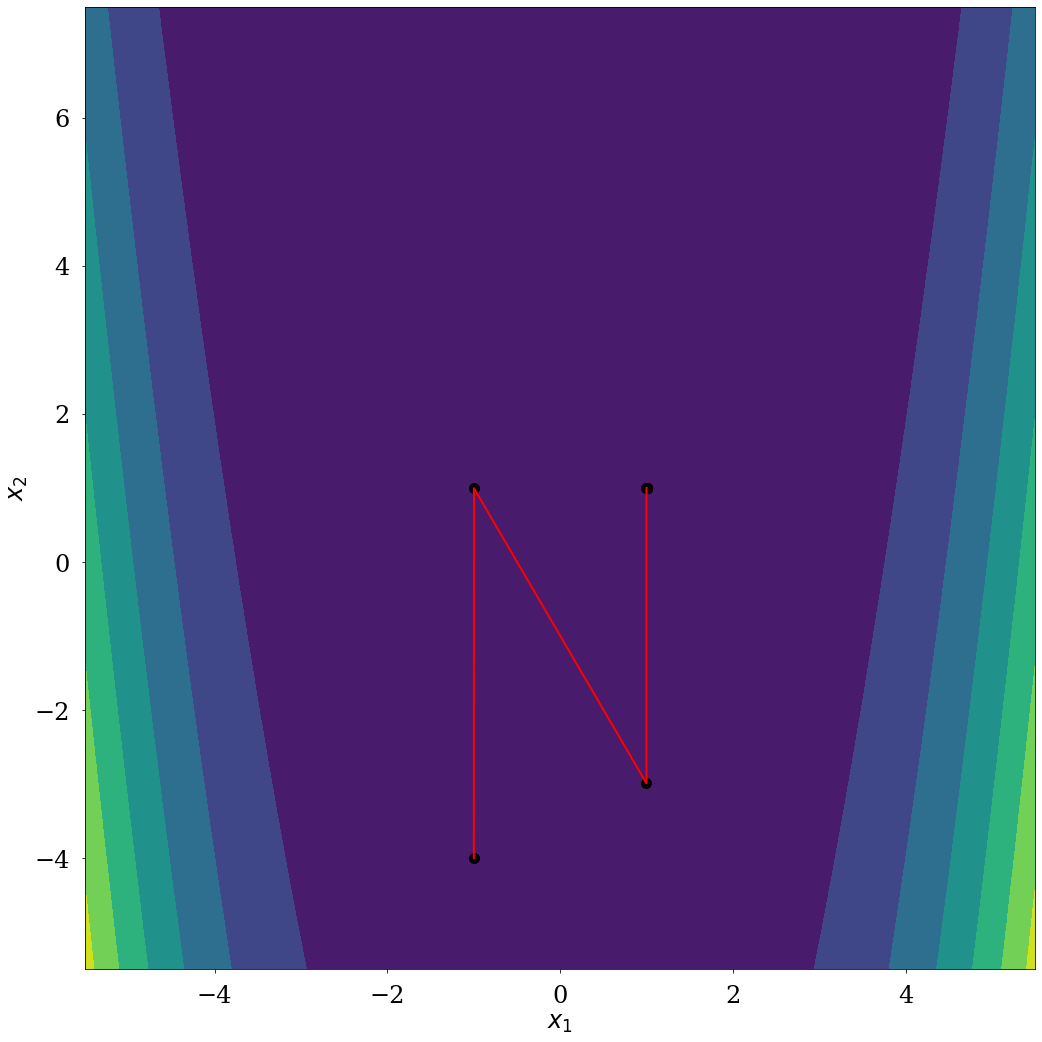

In [182]:
from sympy import *

#minimization

#initial model
mm=np.zeros(2)
mm[0]=-1
mm[1]=-4

x1,x2= symbols('x1 x2')
ff=(1-x1)**2+100*(x2-x1**2)**2 #Rosenbrock

#gradient
dfdx1=diff(ff,x1)
dfdx2=diff(ff,x2)
#Hessian
h1=diff(dfdx1,x1)
h2=diff(dfdx1,x2)
h3=diff(dfdx2,x1)
h4=diff(dfdx2,x2)
df=np.zeros(2)
hh=np.zeros((2,2))

maxiter=10
miter=np.zeros((maxiter+1,2))
miter[0,:]=mm
for iter in range(1,maxiter+1):
    #Gradient
    df[0]=dfdx1.subs([(x1,mm[0]),(x2,mm[1])])
    df[1]=dfdx2.subs([(x1,mm[0]),(x2,mm[1])])
        
    #Hessian
    hh[0,0]=h1.subs([(x1,mm[0]),(x2,mm[1])])
    hh[0,1]=h2.subs([(x1,mm[0]),(x2,mm[1])])
    hh[1,0]=h3.subs([(x1,mm[0]),(x2,mm[1])])
    hh[1,1]=h4.subs([(x1,mm[0]),(x2,mm[1])])
    
    #update model
    mnew = mm - np.dot(np.linalg.inv(hh),df)
    miter[iter,:]=mnew
    mm = mnew.copy()

xmin=-5.5
xmax=5.5
ymin=-5.5
ymax=7.5
x0 = np.linspace(xmin,xmax,100)
y0 = np.linspace(ymin,ymax,100)
xp,yp = np.meshgrid(x0,y0)
zp=(1-xp)**2+100*(yp-xp**2)**2 #Rosenbrock
plt.subplots(1,figsize=(15,15))
plt.contourf(x0,y0,zp)
plt.plot(miter[:,0],miter[:,1],'ko',markersize=10)
plt.plot(miter[:,0],miter[:,1],'r',linewidth=2)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.tight_layout()
plt.savefig("steepest_rosenbrock_hessian.png")

# Latihan 2

Objective function,
\begin{equation}
f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2
\end{equation}

dengan mo